In [1]:
pip install nltk wordcloud


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: C:\Users\user\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

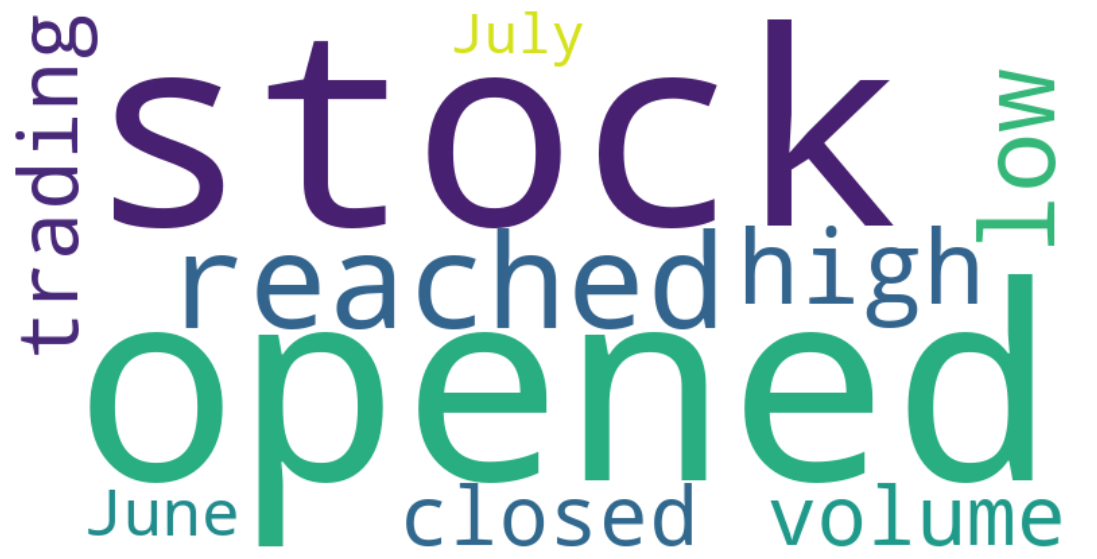

In [4]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load your CSV file
file_path = r"C:\Users\user\Desktop\Data Science\Repository\Maxis Stock & Share\Maxis_Stock_Price (19.7.24).csv"
data = pd.read_csv(file_path)

# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%Y%m%d')

# Generate descriptive text from stock price data
descriptive_text = []
for index, row in data.iterrows():
    summary = (
        f"On {row['Date'].strftime('%B %d, %Y')}, the stock opened at {row['Open']}, "
        f"reached a high of {row['High']}, a low of {row['Low']}, and closed at {row['Close']}. "
        f"The trading volume was {row['Volume']}."
    )
    descriptive_text.append(summary)

# Combine all summaries into a single text
full_text = ' '.join(descriptive_text)

# Tokenize the text
tokens = nltk.word_tokenize(full_text)

# Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word.lower() not in stop_words and word.isalpha()]

# Create frequency distribution
freq_dist = nltk.FreqDist(filtered_tokens)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freq_dist)

# Plot the word cloud
plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()